![](https://www.radiocidadejundiai.com.br/wp-content/uploads/2019/08/coracao.jpg)

---
# **DIAGNÓSTICO DE DOENÇAS CARDIOVASCULARES USANDO MACHINE LEARNING**

---
---

Última atualização em 25 de junho de 2020

---

Segundo a Organização Mundial da Saúde (OMS), atualmente, mais pessoas morrem anualmente por essas enfermidades do que por qualquer outra causa. Essas doenças são de caráter sistêmico, o que implica no comprometimento de outros órgãos, em função da circulação sanguínea, como fonte de oxigênio e glicose.

Diversos fatores de risco estão associados ao desenvolvimento de DCV, os quais podem ser modificáveis ou não modificáveis. Os fatores modificáveis incluem hiperlipidemia, tabagismo, etilismo, obesidade, sedentarismo, má alimentação, etc; já os não modificáveis incluem fatores hereditários, idade, sexo e raça.


Desta forma, estima-se que cerca de 90% dessas doenças poderiam ser evitadas realizando pequenas mudanças na dieta e estilo de vida, é possível melhorar a saúde do coração e a qualidade de vida.

O que são Doenças Cardiovasculares (DCV)?
As doenças do coração são alterações no funcionamento do sistema cardíaco, sendo este responsável por transportar oxigênio e nutrientes necessários às células.

De acordo com a OMS, as doenças do coração incluem

* Doença coronariana;
* Doença cerebrovasculas;
* Doença arterial periférica;
* Doença cardíaca reumática;
* Cardiopatia congênita;
* Doença reumática; entre outras.

O [Instituto Nacional de Saúde](https://medium.com/r/?url=https%3A%2F%2Fwww.sns.gov.pt%2Fwp-content%2Fuploads%2F2016%2F03%2FDoencasCardiovasculares.pdf) fornece mais detalhes sobre as DCV.

**Uso de Machine Learning na Detecção de Doenças Cardiovasculares**

Nos dias atuais, a implementação de técnicas computacionais na área da saúde tem se tornado cada vez intensa, com destaque para algoritmos de aprendizado de máquina e redes neurais artificiais. Fazendo-se uso de modelos matemáticos, é possível afirmar ou negar, a partir de conjunto de dados clínicos, o grau de influência de determinados sintomas no desenvolvimento ou aparecimento de doenças.

<center><img alt="IA" width="20%" src="https://cdn-images-1.medium.com/max/800/1*c3d4Ra2QHVerYdUhyW-S4Q.png"></center>

Existem hoje várias pesquisas na área de Machine Learning visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.
Estudos publicados na revista na revista Nature Biomedical Engineering mostram que algoritmos de Deep Learning foram capazes de antecipar doenças cardíacas em até 5 anos.

Recentemente, cientistas da Google, em parceria com a Verily, usaram o Machine Learning para analisar um conjunto de dados de quase 300 mil pacientes, a fim de detectar doenças cardiovasculares analisando a parte de trás dos olhos. O algoritmo conseguiu 70% de acerto ao inferir quais pacientes haviam sofrido acidentes cardiovasculares, taxa essa apenas 2% menor em comparação aos métodos tradicionais que precisam de exames de sangue.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.


## **Proposta deste artigo**

O presente artigo realiza análises a partir do conjunto de dados Cleveland Clinic Foundation que encontra-se disponível no Repositório UCI Machine Learning. Inicialmente, é abordada uma **análise exploratória dos dados** e, em seguida, é feita a **implementação de um modelo de Machine Learning** para prever quais pacientes, dentro do dataset, possuem doenças cardiovasculares.
É fundamental ressaltar que os dados sigilosos, como nome, documentos pessoais e identidade dos pacientes foram removidos do banco de dados.

## **Obtenção do Dados**

O conjunto de dados processados contém dados de 303 pessoas e 76 atributos. Contudo, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de Data Science usará essas mesmas 14 variáveis principais.

* O arquivo csv com os dados de **303 pessoas** e **14 atributos** pode ser baixado neste [link](https://medium.com/r/?url=https%3A%2F%2Fraw.githubusercontent.com%2Fcarlosfab%2Fcurso_data_science_na_pratica%2Fmaster%2Fmodulo_03%2Fheart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do dataset usado neste projeto se encontra neste [link](https://medium.com/r/?url=https%3A%2F%2Fgithub.com%2Fcarlosfab%2Fcurso_data_science_na_pratica%2Fblob%2Fmaster%2Fmodulo_03%2Fheart-disease.names).

* Há também um dataset disponibilizado pela [Sociedade Brasileira de Cardiologia](https://medium.com/r/?url=http%3A%2F%2Fwww.cardiometro.com.br%2Fanteriores.asp), que pode ser baixados neste [link](https://medium.com/r/?url=https%3A%2F%2Fraw.githubusercontent.com%2Fcarlosfab%2Fcurso_data_science_na_pratica%2Fmaster%2Fmodulo_03%2Fmortes_doencas_cardiovasculares.csv), que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004–2017).

---

Para realizar a análise inicial do conjunto de dados, adotaremos algumas bibliotecas geralmente utilizadas para esta finalidade:

* **Pandas** - manipulação de dados;
* **NumPy** - compatível com arranjos, vetores e matrizes de N dimensões;
* **Matplotlib** e **Seaborn** - criação de gráficos e visualização de dados;

In [2]:
# IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS PARA A ANÁLISE EXPLORATÓRIA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style()

Agora, usando a biblioteca Pandas, poderemos importar e visualizar os conjuntos de dados.

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [3]:
# IMPORTAÇÃO DOS DATASETS PARA ANÁLISE

# Dataframes

df_uci = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv")

df_brasil = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv")

In [4]:
# VISUALIZAÇÃO DAS 5 PRIMEIRAS LINHAS DO CONJUNTO DE DADOS DA 'UCI MACHINE LEARNING'

df_uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Antes de iniciar a análise dos dados, precisamos compreender o significado de cada variável que compõe o *dataset*. Assim, abaixo, podemos visualizar a lista com a descrição de todos os atributos.

**Informações sobre os atributos:**


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *teste de esforço cardíaco*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

Para as análises realizadas neste projeto, a principal variável de interesse será `num`, uma vez que este atributo nos fornece informações se o paciente possui ou não doenças cardiovasculares.

Observando as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [5]:
# VARIÁVEL ALVO ANTES

df_uci.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Agora, iremos converter os valores que são maiores ou iguais a 1 para 1.

In [6]:
# CONVERTENDO VALORES >= 1 EM 1

df_uci.loc[df_uci.num != 0, 'num'] = 1

In [7]:
# VARIÁVEL ALVO DEPOIS

df_uci.num.value_counts()

0    164
1    139
Name: num, dtype: int64

A partir dessa mudança nos valores da variável `num` podemos exporar os dados de maneira mais aprofundada.

## **Análise Exploratória**

**Qual o tamanho do *dataset* e *são* os tipos das variáveis?**


In [8]:
# TAMANHO DO CONJUNTO DE DADOS

print('Linhas: {}'.format(df_uci.shape[0]))
print('Colunas: {}'.format(df_uci.shape[1]))


Linhas: 303
Colunas: 14


In [9]:
#  TIPOS DAS VARIÁVEIS

df_uci.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

Podemos observar que o conjunto de dados possui 303 linhas e 14 colunas e é constituído por variáveis do tipo *float* e *int*.

###**Quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no *dataset*?**

In [ ]:
df_uci.num.value_counts()

0    164
1    139
Name: num, dtype: int64

Assim, podemos concluir que existem **139 pacientes** listados no *dataset* possuem doenças cardiovasculares, de um total de 303.

###**Do total de pacientes, quais as quantidades de homens e de mulheres?**

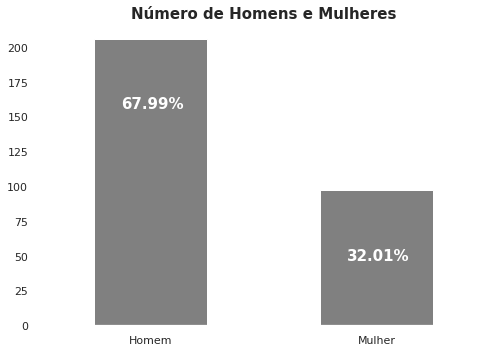

In [10]:
fig, ax = plt.subplots(figsize = (7,5))
ax = df_uci.sex.value_counts().plot(kind = 'bar', color = 'grey')
ax.set_title('Número de Homens e Mulheres', fontsize = 15, loc ='center', weight = 'bold')
ax.set_xticklabels(['Homem' , 'Mulher'], rotation = 0)
ax.patch.set_facecolor('white')

total = []

for i in ax.patches:
    total.append(i.get_height())

soma = sum(total)

for i in ax.patches:
    ax.text(i.get_x() + .12, i.get_height() - 50,
            str(round((i.get_height()/soma)*100, 2)) + '%',
            fontsize = 15, color = 'white', weight = 'bold')
    
plt.tight_layout()

###**O *dataset* possui valores ausentes?**

In [11]:
df_uci.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Podemos verificar pelas informações acima, que o *dataset* não possui valores ausentes.

### **Qual a relação entre a idade dos pacientes e o nível de colesterol?**

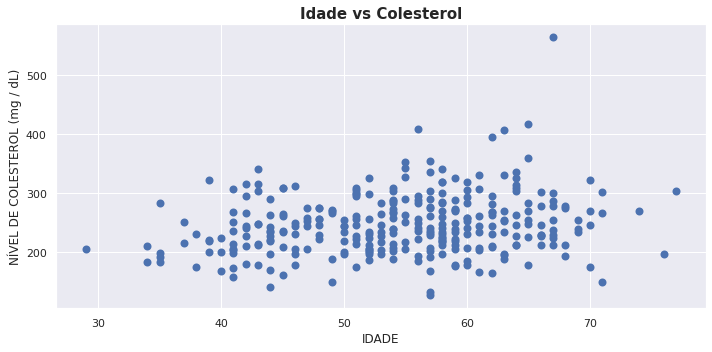

In [12]:
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter('age','chol', data = df_uci, linewidth = 2)
ax.set_title('Idade vs Colesterol', fontsize = 15, loc ='center', weight = 'bold')
ax.set_xlabel('IDADE')
ax.set_ylabel('NÍVEL DE COLESTEROL (mg / dL)')

plt.tight_layout()

Apesar de o colesterol ser essencial para os seres humanos, pois ele atua como componente de todas as membranas das nossas células, é fundamental manter o equilíbrio da sua quantidade em nosso corpo. **O nível de colesterol total recomendado é de, no máximo, 200 mg/dL**. E como sabemos, altos níveis de colesterol está relacionado a altos riscos de desenvolvimentos de doenças cardiovasculares.

Como podemos observar no gráfico acima, **a maior parte dos pacientes possuem nível de colesterol acima do normal**. Além disso, o gráfico de dispersão nos mostra que quanto maior a idade do paciente, maior seu nível de colesterol, sendo esta, uma relação direta.

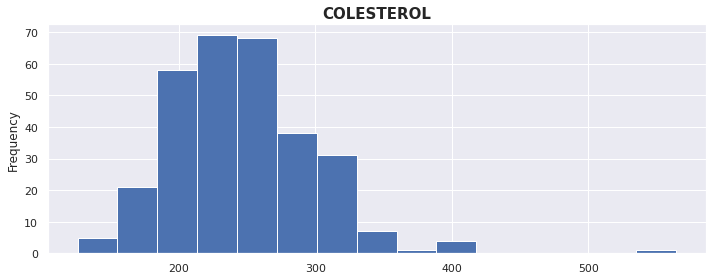

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
ax = df_uci.chol.plot.hist (bins = 15)
ax.set_title("COLESTEROL", fontsize = 15, loc = 'center', weight = 'bold')
plt.tight_layout();

O histograma é fundamental para enterdermos a distribuição de uma determinada variável dentro do conjunto de dados. Através do gráfico acima, podemos observar que a variável colesterol aparece com maior frequência para valores entre 200 e 300 mg/dL. O que significa que a maior parte dos pacientes apresentam nível de colesterol total nessa faixa, o que também pode ser facilmente observado no gráfico de dispersão.

### **Qual o grau de correlação entre as variáveis do *dataset*?**

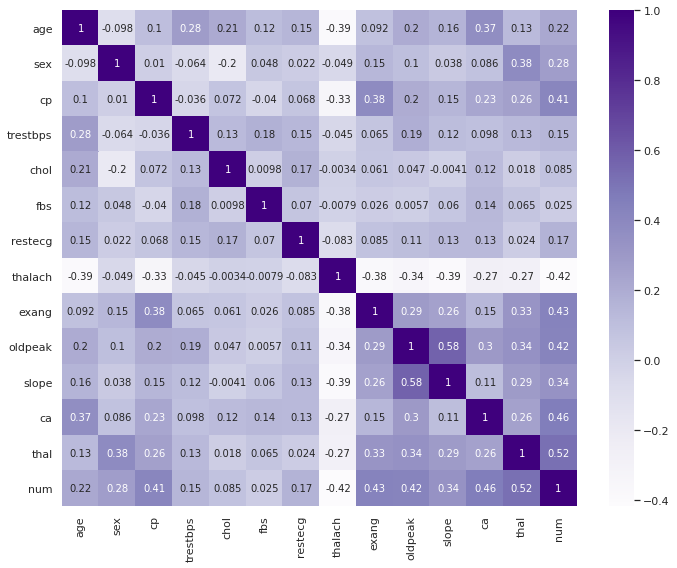

In [14]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(df_uci.corr() , fmt= '.2g', cmap = 'Purples', annot= True )
plt.tight_layout()

O mapa acima basicamente nos mostra a correlação entre as variáveis, quanto maior o valor, maior é a correlação.

Assim, podemos observar que as variáveis com a maior correlação são oldpeak (depessão do segmento ST induzida pelo exercício em relação ao repouso) e slope (inclinação do segmento ST no pico do exercício), com valor de 0,58.
Enquanto a menor correlação existente, - 0,42, é entre as variáveis num (diagnóstico de doença cardíaca) e thalach (frequência cardíaca máxima atingida).

## **Análises semelhantes podem ser feitas para o conjunto de dados do Brasil**

In [15]:
# VISUALIZAÇÃO DO DATASET DF_BRASIL

df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


In [17]:
# QUAL O TAMANHO DO DATASET DF_BRASIL?

print('O dataset df_brasil possui {} linhas e {} colunas'.format(df_brasil.shape[0], df_brasil.shape[1]))

O dataset df_brasil possui 14 linhas e 2 colunas


In [18]:
# QUAIS OS TIPOS DE VARIÁVEIS?

df_brasil.dtypes

ano                        int64
mortes_doencas_cardio    float64
dtype: object

In [19]:
# O DATASET POSSUI VALORES AUSENTES?

df_brasil.isnull().sum()

ano                      0
mortes_doencas_cardio    0
dtype: int64

### **Há quantas mortes por doenças cardiovasculares no Brasil?**

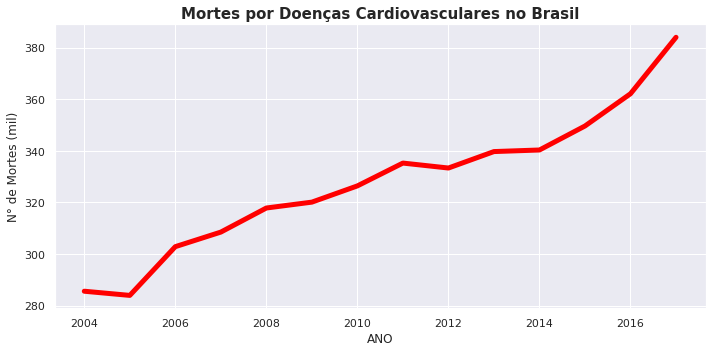

In [20]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot('ano','mortes_doencas_cardio', data = df_brasil, linewidth = 5, markersize = 10, color = 'red')
ax.set_title('Mortes por Doenças Cardiovasculares no Brasil', fontsize = 15, loc ='center', weight = 'bold')
ax.set_xlabel('ANO')
ax.set_ylabel('N° de Mortes (mil)')

plt.tight_layout()

Como podemos observar através do gráfico acima, as análises dos dados entre os ano de 2004 e 2017 confirmam que há um aumento progressivo no número de mortes por doenças do coração no Brasil, reforçando as preocupações do Ministério da Saúde a respeito dessas doenças, com 2017 atingindo um pouco mais de 380 mil mortes.

### **Conclusões - Análise Exploratória**

Apesar de todos os esforços das organizações de saúde para reduzir o índice de doenças do coração ao redor do mundo, os números ainda são bastante preocupantes.

Pudemos observar que, como esperado, existem fortes correlaçoes entre algumas variáveis, como por exemplo, a relação entre a frequência máxima de batimentos e a ocorrência de doença. Outro fator que está diretamente relacionado com a maior parte dos pacientes é o alto nível de colesterol, onde este contribui diretamente para o desenvolvimento de doenças cardiovasculares.

Entre os anos de 2004 e 2017, percebemos que o número de casos no Brasil subiu ao longo do tempo, o que reforça a importância da adoção de práticas saudáveis por parte dos brasileiros.

Também podemos entender a importância das análises de dados no processo de compreensão do comportamento das doenças cardiovasculares ao redor do mundo, permitindo a criação de estratégias para a intensificação das pesquisas sobre doenças cardiovasculares e de programas de prevenção.

Análises mais profundas, usando modelos de aprendizado de máquina, podem a partir de características dos indivíduos, calcular a probabilidade de determinados pacientes possuírem ou desenvolverem doenças cardiovasculares, inclusive auxiliando médicos em diagnósticos mais precisos.

---

# **Aplicação do modelo de Machine Learning**

Nesta etapa do projeto, implementaremos um modelo de Machine Learning para prever os casos em que um determinado paciente possui doença cardiovascular ou não. Assim, é necessário que o modelo de Machine Learning dê uma classificação ao ser alimentado com diversas variáveis independentes (*features*).

Para a criação do modelo de Machine Learning, utilizaremos a biblioteca ***Scikit-Learn***, que possui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

<center><img alt="Analisando Airbnb" width="15%" src="https://avatars2.githubusercontent.com/u/365630?v=2&s=400"></center>

Você pode conferir os detalhes sobre o *Scikit-Learn* acessando este [link](https://scikit-learn.org/stable/).

### **Preparação dos Dados**

**Nesta etapa do projeto serão utilizados os dados do *dataset* df_uci**

Em todos os projetos de Machine Learning a etapa de pré-processamento de dados é fundamental. Aplicando as técnicas corretas para preparação dos dados, podemos aumentar consideravelmente o desempenho dos modelos implementados.

Para alimentar o modelo de Machine Learning, é necessário separar a variável alvo (dependente) do *dataset* das demais (independentes).

Geralmente, as variáveis são divididas como X e y, este projeto vai adotar o mesmo padrão.

Após separar nossas variáveis devidamente, como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, será usado o **StardardScaler**, que vem junto com **sklearn.preprocessing**, para padronizar nossos dados numéricos.

In [21]:
# IMPORTAÇÃO DAS FERRAMENTAS PARA O PRÉ-PROCESSAMENTO DOS DADOS

from sklearn.preprocessing import StandardScaler

In [22]:
# SEPARAÇÃO DAS VARIÁEIS

X = df_uci.drop('num', axis = 1)
y = df_uci.num

In [23]:
# PADRONIZAÇÃO DOS DADOS NUMÉRICOS

X = StandardScaler().fit_transform(X)

Por fim, antes de implementar o modelo, iremos dividir o nosso *dataset* em dados de treino e de teste.

Essa etapa também é fundamental, uma vez que ela evita que o modelo possa fazer previsões erradas ao "viciar", em palavras simples, o modelo com um determinado conjunto de dados. Ou seja, quando nós usamos os mesmos dados para treinar e testar nossos modelos, é provável que ele não aprenda a classificar os dados, mas apenas "decorar" as respostas. Assim, ao submetir esse modelo para novos dados, ele não vai conseguir uma boa acurácia.

Por isso, é fundamental usar dados diferentes para treino e teste.

In [24]:
# DIVISÃO DOS DADOS EM TREINO E TESTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28)

### **Modelo Random Forest**

Random Forest (floresta aleatória) é um algoritmo de aprendizagem supervisionada. Como você pode perceber pelo seu nome, ele cria uma floresta de um modo aleatório.

Segundo Niklas Donges, em um artigo do Towards Data Science, de modo simples: o algoritmo de florestas aleatórias cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.

<center><img alt = "Analisando Airbnb" width = "15%" src="https://static.thenounproject.com/png/961660-200.png"></center>

Uma grande vantagem do algoritmo de florestas aleatórias é que ele pode ser utilizado tanto para tarefas de classificação quanto para regressão, o que representa a maioria dos sistemas de aprendizagem de máquina atuais.

Você pode conferir um artigo completo do **Towards Data Science** sobre o modelo Random Forest clicando [aqui](https://towardsdatascience.com/understanding-random-forest-58381e0602d2).

In [25]:
# IMPORTANDO O MODELO RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [26]:
# INSTANCIANDO O MODELO

RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

In [27]:
# TREINANDO O MODELO

RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### **Verificando o desempenho do modelo**

Uma das principais métricas utilizadas para avaliar o desempenho de um modelo de Machine Learning é a acurácia. Contudo, é importante ressaltar que cada caso é particular, com isso, uma boa acurácia nem sempre garantirá que o modelo está bom.

No caso da detecção de doenças cardiovasculares, o interesse é maximizar o número de verdadeiros positivos e minimizar o número de verdadeiros positivos e minimizar o número de falsos negativos, apesar de ser uma tarefa difícil de realizar.

Neste projeto, além da métrica de acurácia será utilizada a função classification_report para ver ver o desempenho do modelo sobre as métricas de precisão, ***recall, f1-score e support***.

In [28]:
# IMPORTAÇÃO DAS FERRAMENTAS DE MÉTRICAS

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
# REALIZANDO A PREVISÃO NOS DADOS DE TESTE

y_pred = RF_model.predict(X_test)

In [30]:
# VIZUALIZANDO A ACURÁCIA GERAL

print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

[Acurácia] Random Forest: 0.8352941176470589


In [31]:
# VISUALIZANDO O CLASSIFICATION REPORT

print('\n[Classification Report] Random Forest')

print(classification_report(y_test, y_pred))


[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.84      0.84      0.84        43

    accuracy                           0.84        85
   macro avg       0.84      0.84      0.84        85
weighted avg       0.84      0.84      0.84        85



**Descrição das métricas**

* **Precision** - Precisão de previsões positivas..
* **Reacall** - Fração de positivos que foram identificados corretamente.
* **f1-score** - representa a média harmonica entre precision e recall, sendo 0 o pior valor e 1 o melhor.

Aparentemente, o modelo apresenta bons resultados nas métricas avaliadas. Contudo, como citado anteriormente, isso não pode garantir totalmente que o modelo seja bom.

Para complementar a nossa análise de desempenho, é interessante visualizar a **matriz de confusão**

<center><img alt = "Analisando Airbnb" width = "50%" src="https://miro.medium.com/max/938/1*s7VB26Cfo1LdVZcLou-e0g.png"></center>

* **VP** - Se o paciente tiver doença cardíaca e o modelo prever que possui.
* **FP** - Se o paciente não tiver doença cardíaca e o modelo prever que possui.
* **FN** - Se o paciente tiver doença cardíaca e o modelo prever que não.
* **VN** - Se o paciente não tiver doença cardíaca e o modelo prever que não.

In [32]:
# VISUALIZANDO A MATRIZ DE CONFUSÃO

pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,35,7
pos,7,36


A matriz de confusão funciona da seguinte maneira:

Nas linhas constam os casos reais e nas colunas, as previsões feitas pelo modelo.

Por exemplo, existem 35 casos realmente negativos e o modelo previu corretamente. Contudo, em 7 casos também negativos, ele previu como positivo.

### **Conclusões - Modelo de Machine Learning**

Esse exemplo de implementação de modelos de aprendizado de máquina confirma a importância do uso dessas ferramentas no diagnóstico e compreensão das doenças cardiovasculares.

Em particular, o modelo desenvolvido neste projeto conseguiu uma **acurácia de 84%**, ou seja, a cada 10 pacientes, o modelo conseguiu prever quase 9 casos corretamente.

É importante ressaltar que diversas outras técnicas podem ser implementadas a fim de melhorar o desempenho do modelo, a partir de melhorias no pré-processamento de dados e escolha de outros métodos de machine learning. A ampliação do conjunto de dados também é fundamental para a melhoria do modelo, uma vez que no presente projeto foi utilizado um conjunto de dados relativamente pequeno, o que dificulta a implementação do modelo.